In [2]:
import numpy
import pandas

In [3]:
train_dataframe = pandas.read_csv("./train.csv")
test_dataframe = pandas.read_csv("./test.csv")

In [4]:
train_dataframe.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
test_dataframe.head()

,age,gender,bmi,children,smoker,region,charges
0,30,male,22.99,2,yes,northwest,17361.76610
1,24,male,32.70,0,yes,southwest,34472.84100
2,24,male,25.80,0,no,southwest,1972.95000
3,48,male,29.60,0,no,southwest,21232.18226
4,47,male,19.19,1,no,northeast,8627.54110


In [6]:
train_dataframe.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
train_dataframe["gender"].value_counts()

male      505
female    495
Name: gender, dtype: int64

In [8]:
cleanup_nums = {"gender":{"male": 1, "female": 0}}

In [9]:
train_dataframe.replace(cleanup_nums, inplace=True)
test_dataframe.replace(cleanup_nums, inplace=True)
train_dataframe.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [10]:
test_dataframe.head()

,age,gender,bmi,children,smoker,region,charges
0,30,1,22.99,2,yes,northwest,17361.76610
1,24,1,32.70,0,yes,southwest,34472.84100
2,24,1,25.80,0,no,southwest,1972.95000
3,48,1,29.60,0,no,southwest,21232.18226
4,47,1,19.19,1,no,northeast,8627.54110


In [11]:
train_dataframe["gender"].value_counts()

1    505
0    495
Name: gender, dtype: int64

In [12]:
cleanup_nums = {"smoker":{"yes": 1, "no": 0}}

In [13]:
train_dataframe.replace(cleanup_nums, inplace=True)
test_dataframe.replace(cleanup_nums, inplace=True)
train_dataframe.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [14]:
train_dataframe["region"].value_counts()

southeast    278
northeast    247
southwest    244
northwest    231
Name: region, dtype: int64

In [15]:
train_dataframe = pandas.get_dummies(train_dataframe,columns=['region'] )
test_dataframe = pandas.get_dummies(test_dataframe,columns=['region'] )

In [16]:
test_dataframe.head()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,30,1,22.99,2,1,17361.76610,0,1,0,0
1,24,1,32.70,0,1,34472.84100,0,0,0,1
2,24,1,25.80,0,0,1972.95000,0,0,0,1
3,48,1,29.60,0,0,21232.18226,0,0,0,1
4,47,1,19.19,1,0,8627.54110,1,0,0,0


## regression without regularization

In [17]:
train_dataframe.describe()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.615000,0.505000,30.86338,1.080000,0.196000,13075.755883,0.247000,0.231000,0.278000,0.244000
std,14.153908,0.500225,6.04744,1.198765,0.397167,11985.924552,0.431483,0.421683,0.448238,0.429708
min,18.000000,0.000000,15.96000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.60000,0.000000,0.000000,4719.683425,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,30.59000,1.000000,0.000000,9283.021300,0.000000,0.000000,0.000000,0.000000
75%,52.000000,1.000000,35.11250,2.000000,0.000000,15882.795437,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,50.38000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [18]:
train_dataframe['age'] = train_dataframe['age'].apply(lambda x: x ** 2)
test_dataframe['age'] = test_dataframe['age'].apply(lambda x: x ** 2)
train_dataframe.head()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,361,0,27.900,0,1,16884.92400,0,0,0,1
1,324,1,33.770,1,0,1725.55230,0,0,1,0
2,784,1,33.000,3,0,4449.46200,0,0,1,0
3,1089,1,22.705,0,0,21984.47061,0,1,0,0
4,1024,1,28.880,0,0,3866.85520,0,1,0,0


In [19]:
X_train = train_dataframe.loc[:, train_dataframe.columns != 'charges'].values
Y_train = train_dataframe[['charges']].values
X_test = test_dataframe.loc[:, test_dataframe.columns != 'charges'].values
Y_test = test_dataframe[['charges']].values

In [20]:
def cal_w(X,Y):
    W = numpy.matmul(numpy.matmul(numpy.linalg.inv(numpy.matmul(numpy.transpose(X), X)), numpy.transpose(X)), Y)
    return W

In [21]:
W = cal_w(X_train,Y_train)

In [22]:
W

array([[ 3.30752409e+00],
       [-2.83185963e+02],
       [ 3.37031996e+02],
       [ 5.53892111e+02],
       [ 2.38823566e+04],
       [-7.52569883e+03],
       [-7.99692026e+03],
       [-8.83897937e+03],
       [-8.81785138e+03]])

## part B

In [23]:
def cal_MSE(Y, Yhat):
    return numpy.asscalar(numpy.matmul(numpy.transpose(Y - Yhat), (Y - Yhat)))/Y.shape[0]

In [24]:
sizes = []
train_errors = []
test_errors = []
for size in range(20, 1000, 10):
    W = cal_w(X_train[:size],Y_train[:size])
    Yhat_train = numpy.matmul(X_train[:size], W)
    Yhat_test = numpy.matmul(X_test, W)
    sizes.append(size)
    train_errors.append(cal_MSE(Y_train[:size], Yhat_train))
    test_errors.append(cal_MSE(Y_test, Yhat_test))
    #print(cal_MSE(Y_train[:size], Yhat_train))
    #print(cal_MSE(Y_test, Yhat_test))

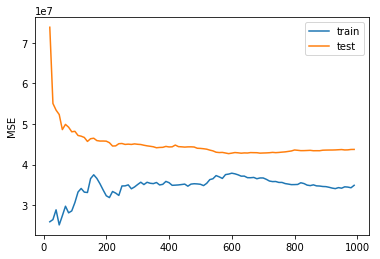

In [28]:
import matplotlib.pyplot as plt
plt.plot(sizes, train_errors, label='train')
plt.legend()
plt.plot(sizes, test_errors, label='test')
plt.legend()
plt.ylabel('MSE')
plt.show()

## Batch Gradient Decent

In [29]:
d = X_train.shape[1]
W = numpy.zeros((d,1))
step_size = 0.0000000004

In [30]:
for step_num in range(1, 200000):
    temp = numpy.zeros((d,1))
    for i in range (0, X_train.shape[0]):
        temp = temp + ((Y_train[i]-numpy.matmul(numpy.transpose(W), X_train[i]))*X_train[i]).reshape(9,1)
    W_next = W + step_size * temp
    W = W_next
Yhat = numpy.matmul(X_train, W)
print("final MSE after "+str(step_num)+" step: "+str(cal_MSE(Y_train, Yhat)))

final MSE after 199999 step: 122715991.56084847


In [31]:
W

array([[  3.18683152],
       [ 26.21011364],
       [238.96797125],
       [ 59.74107693],
       [298.53624625],
       [ 18.30637523],
       [ -9.08822966],
       [ 13.94578975],
       [-21.89711975]])

In [32]:
Yhat_test = numpy.matmul(X_test, W)
print("final MSE of test data after "+str(step_num)+" step: "+str(cal_MSE(Y_test, Yhat_test)))

final MSE of test data after 199999 step: 151051461.36231995


## Stochastic Gradient Decent

In [33]:
W = numpy.zeros((d,1))
step_size = 0.0000000004

In [34]:
for step_num in range(1, 20000000):
    temp = numpy.zeros((d,1))
    i = step_num%1000
    temp = temp + ((Y_train[i]-numpy.matmul(numpy.transpose(W), X_train[i]))*X_train[i]).reshape(9,1)
    W_next = W + step_size * temp
    W = W_next
Yhat = numpy.matmul(X_train, W)
print("final MSE after "+str(step_num)+" step: "+str(cal_MSE(Y_train, Yhat)))

final MSE after 19999999 step: 124977095.7821533


In [35]:
W

array([[ 3.38442291e+00],
       [ 5.82913927e+00],
       [ 2.19888003e+02],
       [ 1.27992666e+01],
       [ 3.12040760e+01],
       [ 3.03571344e+00],
       [ 1.70050571e-01],
       [ 3.60480991e+00],
       [-8.79139469e-01]])

In [36]:
Yhat_test = numpy.matmul(X_test, W)
print("final MSE of test data after "+str(step_num)+" step: "+str(cal_MSE(Y_test, Yhat_test)))

final MSE of test data after 19999999 step: 156323270.19909942


## Regression With Regularization

In [37]:
lambdaI = 4*numpy.identity(X_train.shape[1])
lambdaI.shape

(9, 9)

In [38]:
def cal_w(X,Y, lam):
    lambdaI = lam*numpy.identity(X.shape[1])
    W = numpy.matmul(numpy.matmul(numpy.linalg.inv(numpy.matmul(numpy.transpose(X), X)+lambdaI), numpy.transpose(X)), Y)
    return W

In [39]:
X_train[100:200].shape

(100, 9)

In [40]:
validation_err = []
for p in range(-4,5,1):
    lam = 10**p
    temp = 0
    for i in range(0, 1000, 200):
        X_train_train = numpy.delete(X_train, range(i,i+200), 0)
        X_train_valid = X_train[i:i+200]
        Y_train_train = numpy.delete(Y_train, range(i,i+200), 0)
        Y_train_valid = Y_train[i:i+200]
        W = cal_w(X_train_train,Y_train_train, lam)
        Yhat_train_valid = numpy.matmul(X_train_valid, W)
        temp = temp + cal_MSE(Y_train_valid, Yhat_train_valid)
    validation_err.append(temp/5)
    W = cal_w(X_train,Y_train, lam)
    Yhat_train = numpy.matmul(X_train, W)
    print(cal_MSE(Y_train, Yhat_train))

34673667.87071548
34673667.911172494
34673671.948340915
34674067.28818611
34706568.7767418
35711282.26299803
49759909.07841898
102087142.97740214
122195557.87957357


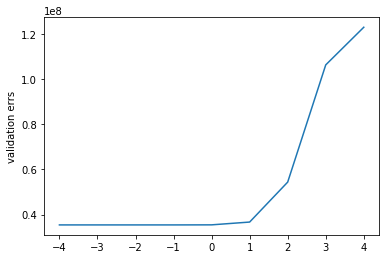

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(-4,5,1), validation_err)
plt.ylabel('validation errs')
plt.show()

In [42]:
lam = 1e-4
W = cal_w(X_train,Y_train, lam)
Yhat_train = numpy.matmul(X_train, W)
print(cal_MSE(Y_train, Yhat_train))
Yhat_test = numpy.matmul(X_test, W)
print(cal_MSE(Y_test, Yhat_test))

34673667.87071548
43731022.13001466
